# ----------------------------------------------------------------------------------------

# EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("C:/Users/works/Desktop/Tech stack/projects-20230901T120436Z-001/projects/BA/Telco Customer Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#Checking column names and datatypes
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Checking for missing values

In [7]:
#Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [9]:
#changing datatype of TotalCharges from object to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#removing customerID column as it is not useful and defining a new dataframe
df2 = df.drop(columns=['customerID'])

In [14]:
# convert churn variable to binary numeric
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [15]:
# Identifying categorical columns
cat_cols = df2.select_dtypes(include=['object']).columns


In [16]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [17]:
# Creating dummy variables for all categorical features
df_dummies = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Correlation

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

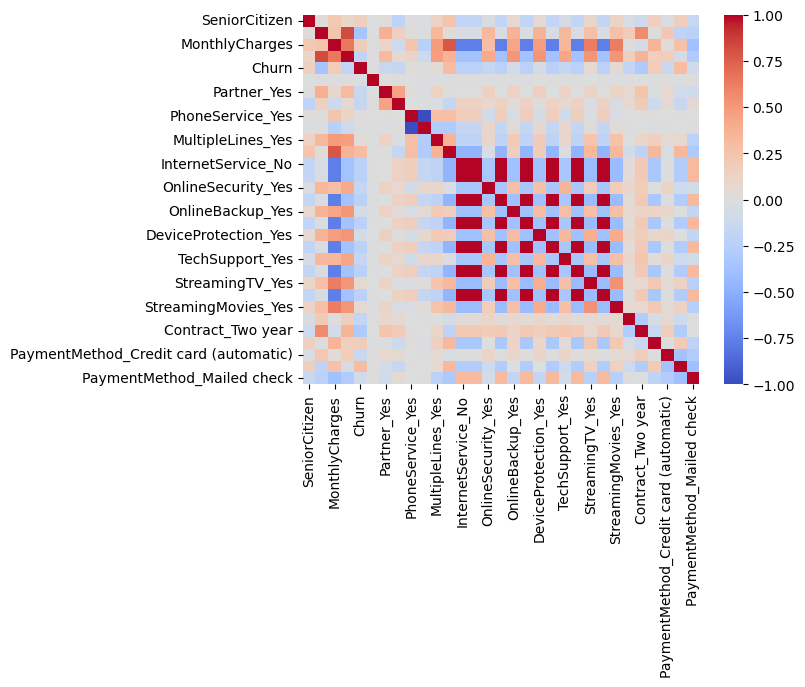

In [52]:
# Creating a correlation matrix
corr = df_dummies.corr()

#heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm')

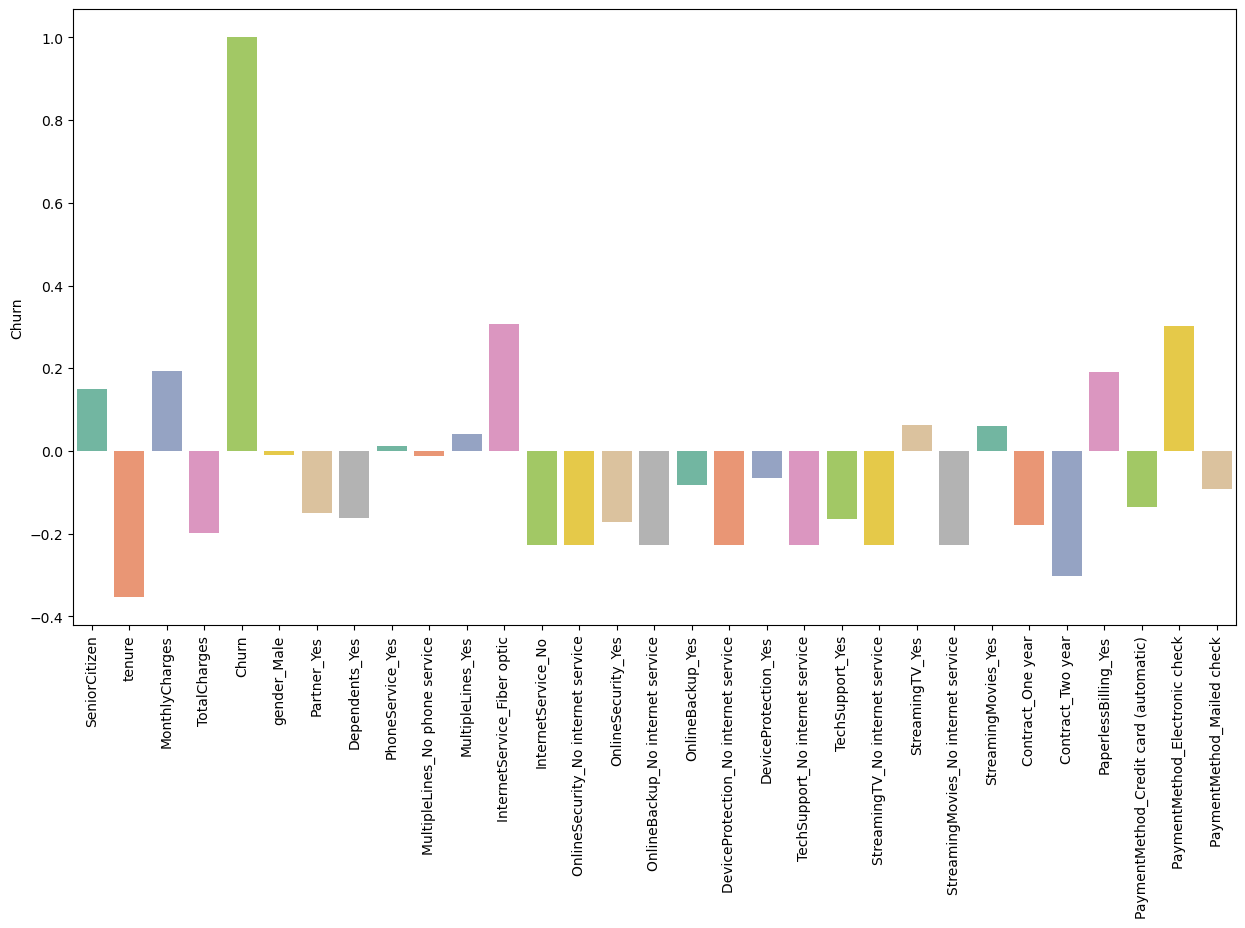

In [56]:
#barplot of the correlation of "Churn" with other variables
plt.figure(figsize=(15,8))
sns.barplot(x=df_dummies.columns, y=df_dummies.corr()['Churn'], palette='Set2')
plt.xticks(rotation=90)
plt.show()



Contracts that are month-to-month, a lack of online security, and tech support appear to have a favourable correlation with customer churn. While tenure appears to be positively connected with churn, two-year contracts do not.

It's interesting to note that services like tech assistance, streaming TV, online backup, online security, etc. that don't require an internet connection appear to be adversely correlated with turnover.

------------------------------------------------------------------------------------------------------

### Demographics

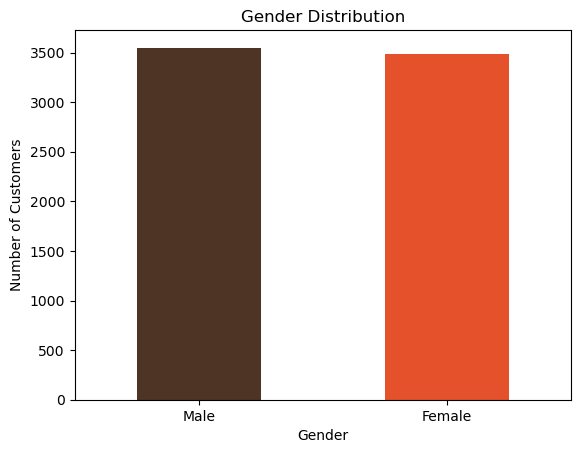

In [57]:
# Plot for gender distribution
colors = ['#4D3425','#E4512B']
df['gender'].value_counts().plot(kind='bar',color=colors,rot=0,title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

 *Gender distribution of the customers is almost equal,(count of male customers is slightly higher than the female customers) 

------------------------------------------------------------------------------------------------------

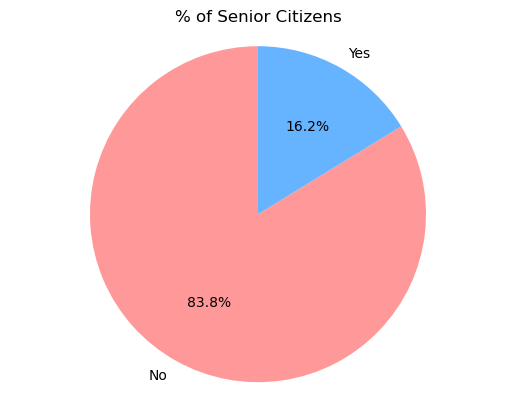

In [58]:
#Plotting pie chart to see the percentage of senior citizens
labels = ['No', 'Yes']
sizes = df['SeniorCitizen'].value_counts(normalize=True) * 100
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)

plt.title('% of Senior Citizens')
plt.axis('equal')
plt.show()

 *Only 16.2% of the customers are senior citizens while rest are mostly younger people

------------------------------------------------------------------------------------------------------

### Tenure and contracts

Text(0.5, 1.0, '# of Customers by their tenure')

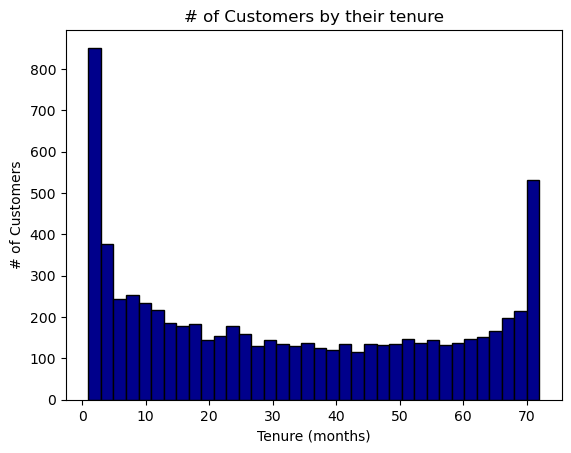

In [59]:
plt.hist(df['tenure'], bins=int(180/5), color='darkblue', edgecolor='black')
plt.xlabel('Tenure (months)')
plt.ylabel('# of Customers')
plt.title('# of Customers by their tenure')

### Contract info

Text(0.5, 1.0, '# of Customers by Contract Type')

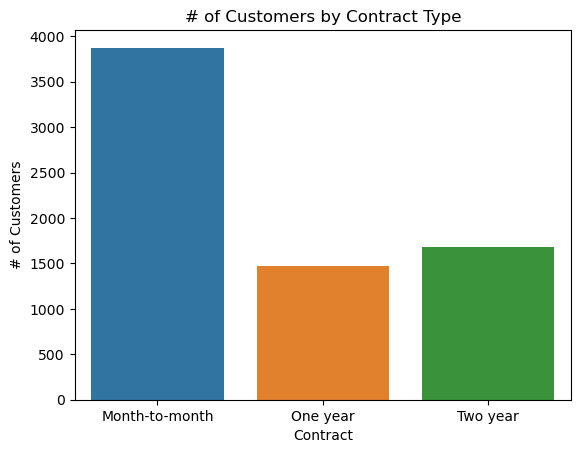

In [60]:
#plot for contract type
sns.countplot(x='Contract', data=df)
plt.ylabel('# of Customers')
plt.title('# of Customers by Contract Type')

By the above plot above it is evident that maximum customers are fall in the month-to-month criteria mainly because it is more affordable. Followed by two-year contracts and lastly one year contracts

------------------------------------------------------------------------------------------------------

#### Let's dig deeper into this and evaluate the tenure of the customers based on their contracts

C:\Users\works\AppData\Local\Temp\ipykernel_2528\2428093449.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']==contract]['tenure'],


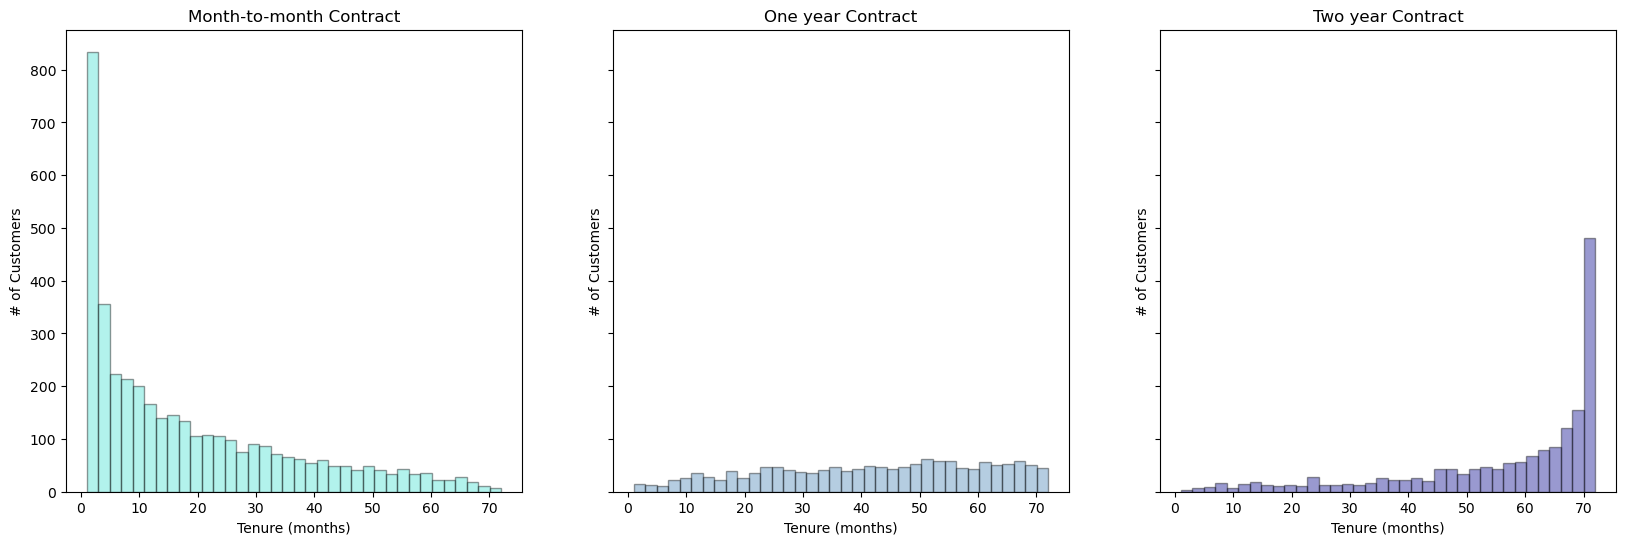

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

for i, contract in enumerate(['Month-to-month', 'One year', 'Two year']):
    ax = sns.distplot(df[df['Contract']==contract]['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = ['turquoise', 'steelblue', 'darkblue'][i],
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=[ax1,ax2,ax3][i])
    ax.set_ylabel('# of Customers')
    ax.set_xlabel('Tenure (months)')
    ax.set_title(f'{contract} Contract')

Interestingly, the majority of monthly contracts only last a few weeks to a few months, although two-year contracts often continue for over 70 months. This demonstrates that clients who sign longer contracts are more loyal to the company and have a greater tendency to stick with it.

------------------------------------------------------------------------------------------------------

#### Reviewing the  services availed by the customers

In [62]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [63]:
# Saving the services in a new variable to evaluate the same

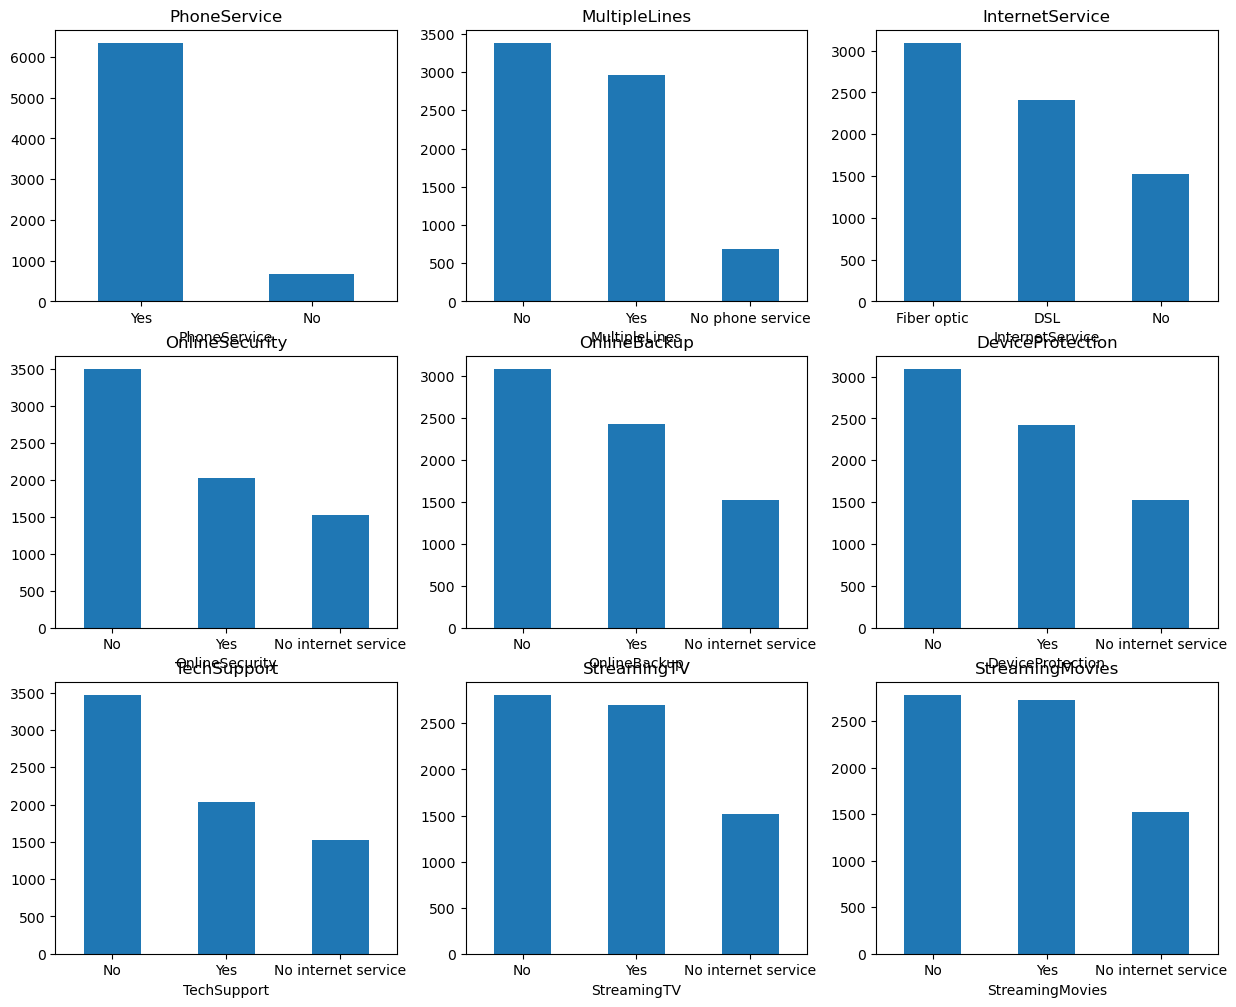

In [64]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, item in enumerate(services):
    ax = axes[i//3, i%3]
    df[item].value_counts().plot(kind='bar', ax=ax, rot=0)
    ax.set_title(item)


The plots above are quite self-explaintory

------------------------------------------------------------------------------------------------------

#### Evaluating churn rate

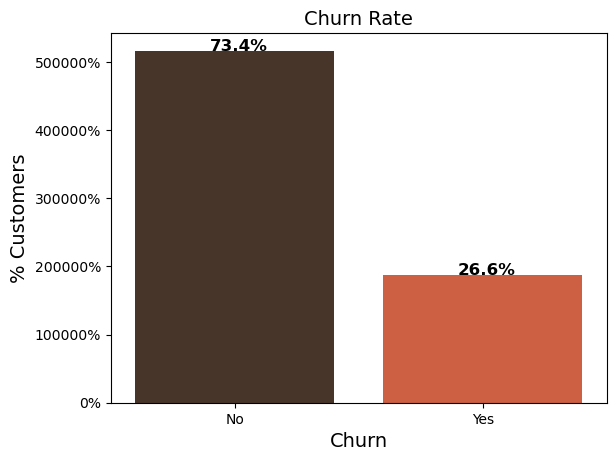

In [65]:
import matplotlib.ticker as mtick

colors = ['#4D3425','#E4512B']
ax = sns.countplot(x='Churn', data=df, palette=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 3
    ax.annotate(percentage, (x, y), fontsize=12, weight='bold')

74% of the clients in our database do not churn while 26.5% of the clients churn. Since a sizable portion of the clients should remain loyal, the data is obviously skewed. We must keep this in mind for our modelling because skewness may result in several false negatives.

### Churn vs tenure

<Axes: xlabel='Churn', ylabel='tenure'>

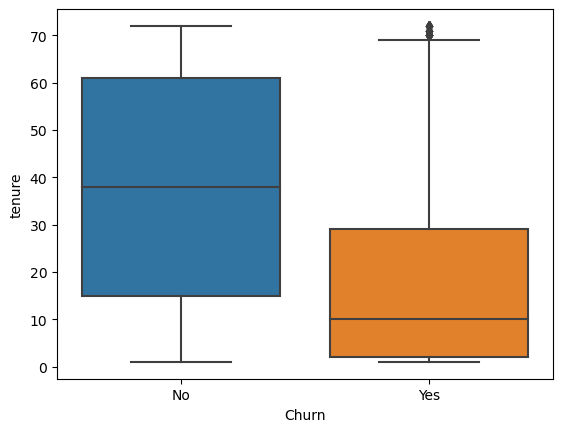

In [66]:
sns.boxplot(x = df.Churn, y = df.tenure)

### Churn vs Contract type

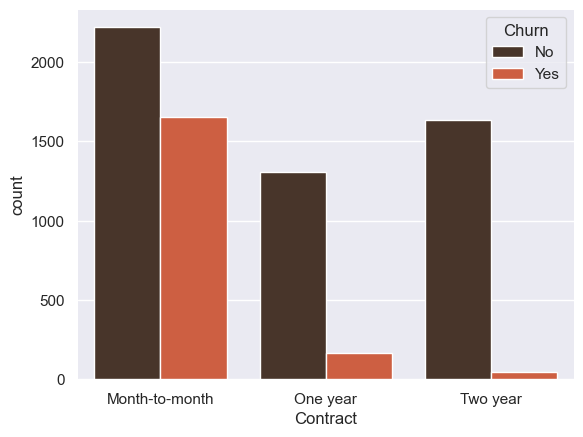

In [67]:
colors = ['#4D3425','#E4512B']

sns.set(style='darkgrid')
sns.countplot(x='Contract', hue='Churn', data=df, palette=colors)
sns.despine(left=True, bottom=True)

### Churn vs monthly charges

C:\Users\works\AppData\Local\Temp\ipykernel_2528\142470912.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
C:\Users\works\AppData\Local\Temp\ipykernel_2528\142470912.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],


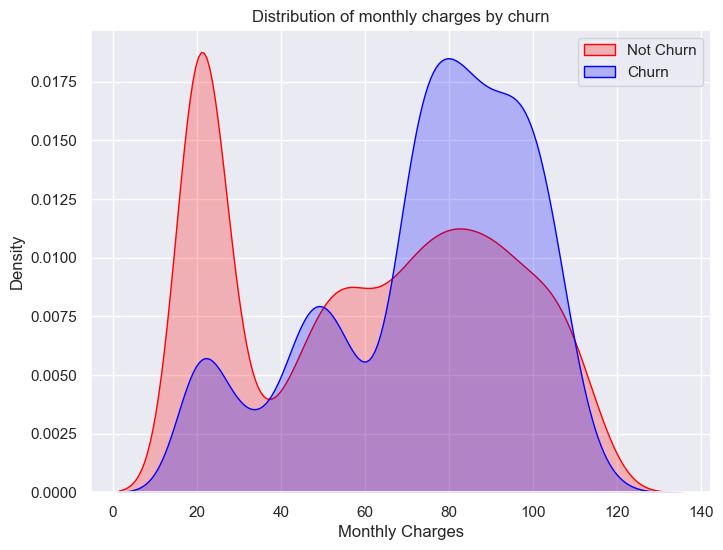

In [68]:
#subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot KDE for non-churn customers
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
            color="Red", shade = True, ax=ax)

# Plot KDE for churn customers
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
            ax=ax, color="Blue", shade= True)

# Setting labels and title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# Set legend
ax.legend(["Not Churn","Churn"],loc='upper right')

Churn rate increases significantly as the monthly charges increase

### Suggestions

Maximum users who churned fall in month-to-month contracts, to increase user retention the company can bring out some new short term offers to keep the users engaged and not leave.

Senior citizens although account for only 16.2% their churn rate is still high, a special plan for senior citizen can definetly be brought up. This would also help with goodwill of the company.

Coming up with new strategies and lucrative offers can help the business to prosper. 



# ----------------------------------------------------------------------------------------

# Modelling

Importing decision tree classifier

In [69]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [70]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [71]:
le = preprocessing.LabelEncoder()

In [72]:
col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for i in col:
    df2[i] = le.fit_transform(df[i])

### Data split

In [73]:
X = df2.drop('Churn', axis= 1)
y = df2['Churn']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.30)

In [75]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [76]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [77]:
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [78]:
clf = DecisionTreeClassifier(min_samples_split=400, max_depth=5)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=5, min_samples_split=400)

------------------------------------------------------------------------------------------------------

## Tree plot

In [79]:
from sklearn import tree

[Text(0.5138888888888888, 0.9166666666666666, 'x[14] <= 0.5\ngini = 0.39\nsamples = 4922\nvalue = [3614, 1308]'),
 Text(0.2037037037037037, 0.75, 'x[17] <= 68.6\ngini = 0.491\nsamples = 2689\nvalue = [1523, 1166]'),
 Text(0.07407407407407407, 0.5833333333333334, 'x[4] <= 3.5\ngini = 0.412\nsamples = 1151\nvalue = [817, 334]'),
 Text(0.037037037037037035, 0.4166666666666667, 'gini = 0.495\nsamples = 399\nvalue = [220, 179]'),
 Text(0.1111111111111111, 0.4166666666666667, 'x[5] <= 0.5\ngini = 0.327\nsamples = 752\nvalue = [597, 155]'),
 Text(0.07407407407407407, 0.25, 'gini = 0.432\nsamples = 187\nvalue = [128, 59]'),
 Text(0.14814814814814814, 0.25, 'x[4] <= 22.5\ngini = 0.282\nsamples = 565\nvalue = [469, 96]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.324\nsamples = 404\nvalue = [322, 82]'),
 Text(0.18518518518518517, 0.08333333333333333, 'gini = 0.159\nsamples = 161\nvalue = [147, 14]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[4] <= 13.5\ngini = 0.497\nsample

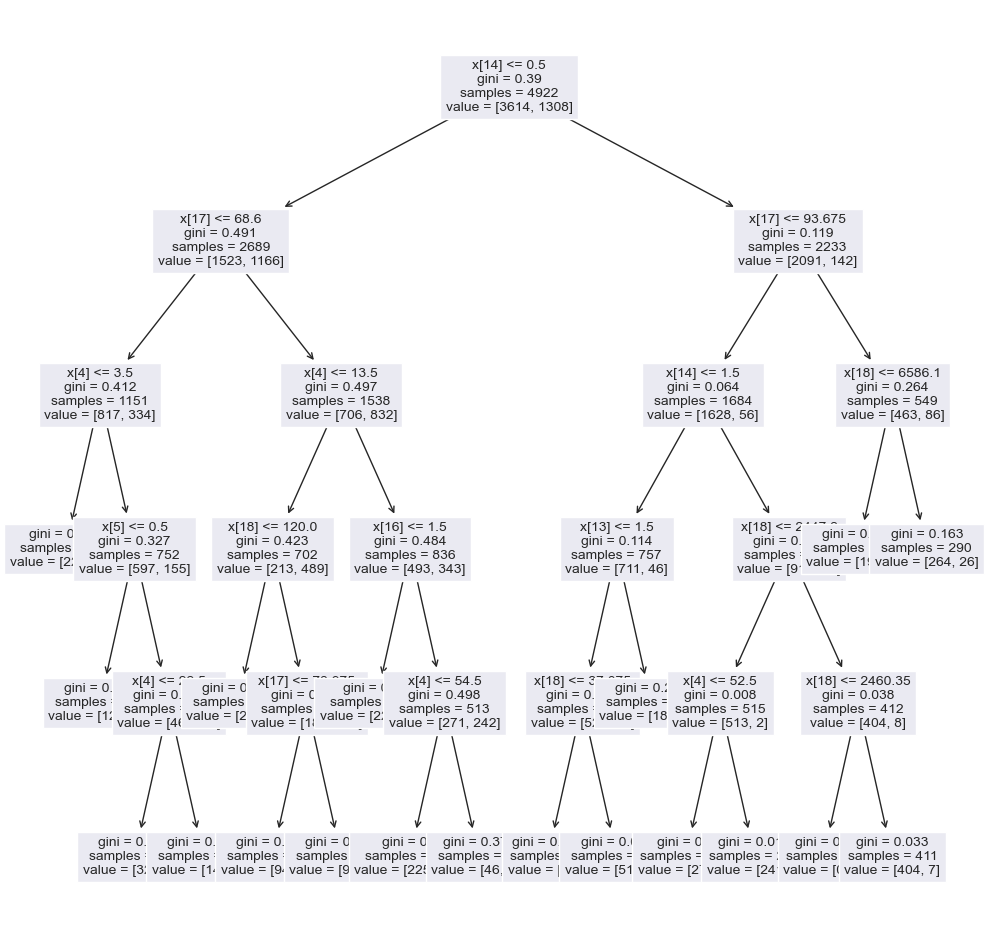

In [80]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)

## Train accuracy

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
clf.predict(X_train)

array([0, 0, 0, ..., 1, 0, 1])

In [83]:
y_pred_train_clf = clf.predict(X_train)

In [84]:
acc = accuracy_score(y_train,y_pred_train_clf)

In [85]:
acc

0.7909386428281187

## Test accuracy

In [86]:
y_pred_test_clf = clf.predict(X_test)

In [87]:
acc2 = accuracy_score(y_test,y_pred_test_clf)

In [88]:
acc2

0.7639810426540284

### Function for prediction

In [89]:
def functionx(b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t):
    temp=[]
    pred=(clf.predict([[b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]]))
    z = le.inverse_transform(pred)
    return pred

Predicting for churn=no 

In [90]:
functionx(1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,129.85)

C:\Users\works\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Predicting for churn=yes

In [91]:
functionx(0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1551.65)

C:\Users\works\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])